# MEASURES OF ASSOCIATION FOR CATEGORICAL DATA

***
***

### In this lecture we will learn Contingency tables and Chi-square. Also some coding basics will be mentioned. In the last part we will focus on data visualization and plot libraries. 


### First we will import the neccesarry libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import operator
import csv
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

### We do not want to see undesired warnings in our report.

In [4]:
warnings.filterwarnings('ignore')


###  It's time to read the dataset. The dataset is taken from https://cses.org/data-download/cses-module-5-2016-2021/. All the necessary information about the dataset is given in the booklets at the website. Especially, reading the booklet about the variable names is recommended. Our dataset is in cvs format. 


In [5]:
#data = pd.read_csv(r'cses5.csv')
#data.info()

### Our dataset columns has code names for variables. We will change the names in oder to simplify the understanding.

In [6]:
#data = data.rename(columns={'E1006_NAM': 'country_name'})
#data = data.rename(columns={'E2002': 'gender'})
#data = data.rename(columns={'E2003': 'education'})
#data = data.rename(columns={'E2006': 'employement'})
#data = data.rename(columns={'E3024_4': 'closeness_party'})
#data = data.rename(columns={'E4006': 'turnout'})
#data = data.rename(columns={'E5075': 'women_in_parliament'})

### Also, we get rid of the unnecessary variables to shrink the data, as shown in the previous info() command, it has 554 different variables (column entries).

In [7]:
#data1 = data[['country_name', 'gender','education',
#        'employement', 'closeness_party','turnout','women_in_parliament']]

#data1.info()

In [8]:
data1 = pd.read_csv(r'data1.csv') 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55515 entries, 0 to 55514
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           55515 non-null  int64  
 1   country_name         55515 non-null  object 
 2   gender               55515 non-null  int64  
 3   education            55515 non-null  int64  
 4   employement          55515 non-null  int64  
 5   closeness_party      55515 non-null  int64  
 6   turnout              55515 non-null  float64
 7   women_in_parliament  55515 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 3.4+ MB


###  In the following cell, we will create a dictionary that use country names as dictionary keys. We will use this dictionary a lot in the remaining of the project. The main logic is spliting the total data by using country names. Therefore, we can use a country name to call all the data about this country.

In [9]:
df_dict = {ct: data1[data1.country_name== ct].reset_index(drop=True) for ct in data1['country_name'].unique()}

###  Before starting the calculations, we need to cleanse the data set. Since missing informations are determined, we need to get rid of them. For instance, a missing information in turnout data is given with '997' and '999'. So we need to make them 0 before calculating the avarage turnout of the countries. While making the missing turnouts 0, we need to change respondent count so that avarage is not affected.

In [10]:
turnout_list = {}
count = {}
b = 0
for country in df_dict.keys():
    count[country]=0
    for i in range(len(df_dict[country]['turnout'])):
        if df_dict[country]['turnout'][i] == 997 or df_dict[country]['turnout'][i] == 999:
            df_dict[country]['turnout'][i] = 0
            count[country] = count[country] + 1
            
    b = sum(df_dict[country]['turnout'])
    if b == 0.0:
        b = 0.000001
        count[country] = len(df_dict[country])-1
    turnout_list[country] =  b/(len(df_dict[country])- count[country])

### Now, we have average turnouts of countries in the turnout_list and we can access them by using country names. 

### Next step, we will sort them to find the most and the least. Some of the countries does not sustain neccessary data, those are at the end of the list.

In [11]:
sorted_turnout = dict(sorted(turnout_list.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_turnout)

{'Australia': 92.12787860931059, 'Belgium': 88.7206829823555, 'Turkey': 88.02779232928033, 'Sweden': 87.25671511627937, 'Brazil': 83.9430167597752, 'Iceland': 80.48768499256693, 'Austria': 79.9780833333332, 'Norway': 78.4532366071428, 'Germany': 75.68032480314962, 'Italy': 73.12688877755477, 'Finland': 72.18648310388005, 'Taiwan': 70.81278338278948, 'Great Britain': 69.74130081300834, 'Canada': 68.02560581583201, 'Costa Rica': 65.9588688410825, 'Ireland': 65.01590233545657, 'New Zealand': 63.40353982300916, 'Hong Kong': 58.414290657439494, 'Republic of Korea': 57.80560467055897, 'Greece': 56.39044573643435, 'Portugal': 55.61186000000017, 'United States of America': 55.171381578947646, 'Lithuania': 50.3169533333337, 'Chile': 46.8356587926498, 'Switzerland': 46.17013993541263, 'France': 1e-06, 'Hungary': 1e-06, 'Montenegro': 1e-06}


### Let's see the top five in a clear format.

In [12]:
top_five_list = [*sorted_turnout.keys()][0:5]

turnouts = {}
for country in top_five_list:
    turnouts[country] = turnout_list[country]
    
print(turnouts)

{'Australia': 92.12787860931059, 'Belgium': 88.7206829823555, 'Turkey': 88.02779232928033, 'Sweden': 87.25671511627937, 'Brazil': 83.9430167597752}


###  From this point we can determine our suspects. We will choose two countries for statistical analysis; one with high turnout value, the other one with low turnout value.

### Our selected countries are :

    1) Turkey (high turnout value: 88.027)
    2) Switzerland (low turnout value: 46.170)

# TURKEY 

***

### We will start with clearing missing informations to get much more clean and logical graphs and tables.

In [13]:
for i in range(len(df_dict['Turkey']['education'])):
    if df_dict['Turkey']['education'][i] == 97 or df_dict['Turkey']['education'][i] == 98 or df_dict['Turkey']['education'][i] == 99:
        df_dict['Turkey']['education'][i] = -1
    elif df_dict['Turkey']['education'][i] == 96:
        df_dict['Turkey']['education'][i] = 0

for i in range(len(df_dict['Turkey']['closeness_party'])):
    if df_dict['Turkey']['closeness_party'][i] == 7 or df_dict['Turkey']['closeness_party'][i] == 8 or df_dict['Turkey']['closeness_party'][i] == 9:
        df_dict['Turkey']['closeness_party'][i] = -1

for i in range(len(df_dict['Turkey']['employement'])):
    if df_dict['Turkey']['employement'][i] == 13 or df_dict['Turkey']['employement'][i] == 14 or df_dict['Turkey']['employement'][i] == 97  or df_dict['Turkey']['employement'][i] == 98  or df_dict['Turkey']['employement'][i] == 99:
        df_dict['Turkey']['employement'][i] = -1

### Now, we can start to learn what is Contingency tables and Chi-square. 

### We will create a table in the following cells with gender and degree of closeness to a party in Turkey. 

### This table is used to learn the concepts but different social statuses that are listed above might be selected.

In [14]:
count_female_t = 0
count_male_t = 0

male = [0]*4
female = [0]*4
for i in range(len(df_dict['Turkey']['gender'])):
    if df_dict['Turkey']['closeness_party'][i] == 1:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[0] = male[0] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[0] = female[0] + 1
    if df_dict['Turkey']['closeness_party'][i] == 2:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[1] = male[1] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[1] = female[1] + 1
    if df_dict['Turkey']['closeness_party'][i] == 3:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[2] = male[2] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[2] = female[2] + 1
    if df_dict['Turkey']['closeness_party'][i] == -1:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[3] = male[3] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[3] = female[3] + 1


### We are going to create sample data which is about gender and degree of closeness to a party in Turkey. Pandas index and columns are used to name rows and columns. 

In [15]:
closeness_party = pd.DataFrame(
    [
        male,
        female
    ],
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"])

closeness_party

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,125,170,17,160
Female,138,258,16,185


### Python uses zero-based indexing. That means, the first element has an index 0, the second has index 1, and so on. If you want to access the fourth value in the chi2_contingency(closeness_party) you need to use [3].

# chi2_contingency

### SciPy’s chi2_contingency() returns four values, 𝜒2 value, p-value, degree of freedom and expected values.

In [16]:
chi2_contingency(closeness_party)

(6.044118123095128,
 0.10948340023844266,
 3,
 array([[116.12347989, 188.97661366,  14.57062675, 152.3292797 ],
        [146.87652011, 239.02338634,  18.42937325, 192.6707203 ]]))

# Expected values

### You can find the expected values at the forth in the returned value. It is in an array form. Let’s print the expected values. We again use the Pandas dataframe. We are going to add index and column values and round the values to the two decimal places round(2).

In [17]:
df=chi2_contingency(closeness_party)[3]

pd.DataFrame(
    data=df[:,:], 
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"]).round(2)

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,116.12,188.98,14.57,152.33
Female,146.88,239.02,18.43,192.67


### The above table is called a contingency table. You calculate the expected values from the observed data using the following equation.

# 𝜒2 value

### The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. This is what chi2_contingency is doing behind the scene. Since Python is 0 based index, in order to print the 𝜒2 we need to use [0] which is the first value.

In [18]:
chisquare=chi2_contingency(closeness_party)[0]

chisquare

6.044118123095128

# p-Value

### You can find the p-value at the second in the returned value. p-value measures the probability of seeing the effect when the null hypothesis is true. So, when the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds.

In [19]:
pvalue=chi2_contingency(closeness_party)[1]

pvalue

0.10948340023844266

# Degree of freedom

### In the returned value from the chi2_contingency, the third one is the degree of freedom. We use [2] which is the third one. The following will output 3.

In [20]:
dof=chi2_contingency(closeness_party)[2]

dof

3

# Critical values

### The level of significance and degree of freedom can be used to find the critical value. As I mentioned, you can find the degree of freedom from the array. State and define probability from the level of significance, 1%, 5% 10%, etc.

In [21]:
significance = 0.01
p = 1 - significance
dof = chi2_contingency(closeness_party)[2]
critical_value = chi2.ppf(p, dof)

critical_value

11.344866730144373

### Let's check the p-value by using the critical value that we calculated.

In [22]:
p = chi2.cdf(critical_value, dof)

p

0.99

### Which confirms the critical value. [ 1-0.01 ]

# The Null and Alternative Hypotheses

### Chi-square test requires to state the null hypothesis, H0, and the alternative hypothesis, H1. The null hypothesis is the statement that our two variables are independent. The alternative hypothesis is the statement that they are not independent.

### If the calculated Chi-square is greater than the critical value we reject the null hypothesis.


In [23]:
chi, pval, dof, exp = chi2_contingency(closeness_party)
print('p-value is: ', pval)

significance = 0.05
p = 1 - significance

critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.10948340023844266
chi=6.044118, critical value=7.814728

At 0.05 level of significance, we accept the null hypotheses. 
They are independent.


### Alternatively, we can compare the p-value and the level of significance. If p-value < the level of significance, we reject the null hypothesis.

In [24]:
chi, pval, dof, exp = chi2_contingency(closeness_party)

significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.109483, significance=0.05

At 0.05 level of significance, we accept the null hypotheses. 
They are independent.


# Switzerland

***

### We will make same analysis on Switzerland. Same steps will be implemented. Try to get familiar with them.

### We will clear missing informations again to get much more clean and logical graphs and tables.

In [25]:
for i in range(len(df_dict['Switzerland']['education'])):
    if df_dict['Switzerland']['education'][i] == 97 or df_dict['Switzerland']['education'][i] == 98 or df_dict['Switzerland']['education'][i] == 99:
        df_dict['Switzerland']['education'][i] = -1
    elif df_dict['Switzerland']['education'][i] == 96:
        df_dict['Switzerland']['education'][i] = 0

for i in range(len(df_dict['Switzerland']['closeness_party'])):
    if df_dict['Switzerland']['closeness_party'][i] == 7 or df_dict['Switzerland']['closeness_party'][i] == 8 or df_dict['Switzerland']['closeness_party'][i] == 9:
        df_dict['Switzerland']['closeness_party'][i] = -1

for i in range(len(df_dict['Switzerland']['employement'])):
    if df_dict['Switzerland']['employement'][i] == 13 or df_dict['Switzerland']['employement'][i] == 14 or df_dict['Switzerland']['employement'][i] == 97  or df_dict['Switzerland']['employement'][i] == 98  or df_dict['Switzerland']['employement'][i] == 99:
        df_dict['Switzerland']['employement'][i] = -1

### We will create a table in the following cells with gender and degree of closeness to a party in Switzerland. 

In [26]:
count_female_s = 0
count_male_s = 0

male = [0]*4
female = [0]*4
for i in range(len(df_dict['Switzerland']['gender'])):
    if df_dict['Switzerland']['closeness_party'][i] == 1:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[0] = male[0] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[0] = female[0] + 1
    if df_dict['Switzerland']['closeness_party'][i] == 2:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[1] = male[1] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[1] = female[1] + 1
    if df_dict['Switzerland']['closeness_party'][i] == 3:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[2] = male[2] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[2] = female[2] + 1
    if df_dict['Switzerland']['closeness_party'][i] == -1:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[3] = male[3] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[3] = female[3] + 1


### We are going to create sample data which is about gender and degree of closeness to a party in Switzerland. Pandas index and columns are used to name rows and columns.

In [27]:
closeness_party = pd.DataFrame(
    [
        male,
        female
    ],
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"])

closeness_party

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,212,1078,579,436
Female,153,989,581,617


### Python uses zero-based indexing. That means, the first element has an index 0, the second has index 1, and so on. If you want to access the fourth value in the chi2_contingency(closeness_party) you need to use [3].

# chi2_contingency

### ciPy’s chi2_contingency() returns four values, 𝜒2 value, p-value, degree of freedom and expected values.

In [28]:
chi2_contingency(closeness_party)

(44.223405599340765,
 1.3529532990376792e-09,
 3,
 array([[ 181.12486545, 1025.71259419,  575.62970936,  522.532831  ],
        [ 183.87513455, 1041.28740581,  584.37029064,  530.467169  ]]))

# Expected values

### You can find the expected values at the forth in the returned value. It is in an array form. Let’s print the expected values. We again use the Pandas dataframe. We are going to add index and column values and round the values to the two decimal places round(2).

In [29]:
df=chi2_contingency(closeness_party)[3]

pd.DataFrame(
    data=df[:,:], 
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"]).round(2)

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,181.12,1025.71,575.63,522.53
Female,183.88,1041.29,584.37,530.47


### The above table is called a contingency table. You calculate the expected values from the observed data using the following equation.

# 𝜒2 value

### The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. This is what chi2_contingency is doing behind the scene. Since Python is 0 based index, in order to print the 𝜒2 we need to use [0] which is the first value.

In [30]:
chisquare=chi2_contingency(closeness_party)[0]

chisquare

44.223405599340765

# p-Value

### You can find the p-value at the second in the returned value. p-value measures the probability of seeing the effect when the null hypothesis is true. So, when the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds.

In [31]:
pvalue=chi2_contingency(closeness_party)[1]

pvalue

1.3529532990376792e-09

# Degree of freedom

### In the returned value from the chi2_contingency, the third one is the degree of freedom. We use [2] which is the third one. The following will output 3.

In [32]:
dof=chi2_contingency(closeness_party)[2]

dof

3

# Critical values

### The level of significance and degree of freedom can be used to find the critical value. As I mentioned, you can find the degree of freedom from the array. State and define probability from the level of significance, 1%, 5% 10%, etc.

In [33]:
significance = 0.01
p = 1 - significance
dof = chi2_contingency(closeness_party)[2]
critical_value = chi2.ppf(p, dof)

critical_value

11.344866730144373

### Let's check the p by using the critical value that we calculated.

In [34]:
p = chi2.cdf(critical_value, dof)

p

0.99

### Which confirms the critical value. [ 1-0.01 ]

# The Null and Alternative Hypotheses

### Chi-square test requires to state the null hypothesis, H0, and the alternative hypothesis, H1. The null hypothesis is the statement that our two variables are independent. The alternative hypothesis is the statement that they are not independent.

### If the calculated Chi-square is greater than the critical value we reject the null hypothesis.


In [35]:
chi, pval, dof, exp = chi2_contingency(closeness_party)
print('p-value is: ', pval)

significance = 0.01
p = 1 - significance

critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  1.3529532990376792e-09
chi=44.223406, critical value=11.344867

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


### Alternatively, we can compare the p-value and the level of significance. If p-value < the level of significance, we reject the null hypothesis.

In [36]:
chi, pval, dof, exp = chi2_contingency(closeness_party)

significance = 0.01
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.000000, significance=0.01

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


# Interactive Graphs for The Null and Alternative Hypotheses

***

### We will add another country with an average turnout value in this stage of the project. Our goal is creating interactive widgets to increase the understanding.

### In order to create interactive widgets, we will be using ipywidgets. 

In [37]:
import ipywidgets as widgets

### In the following interactive widget, we will observe the null and alternative hypotheses on chi-square distribution. We will use three different countries which will be selectable. Also user can select the sigificance of the test

### A table with labels and a graph with rejection region indicated will be generated. Also a final decision will be written at the below of the plot.

### User can observe the differences clearly by changing countries and significance values.

In [38]:
aa = widgets.Dropdown(
    options=['0.05', '0.01', '0.001'],
    value='0.05',
    description='Significance:',
    disabled=False,
    continuous_update=False
)

bb = widgets.Dropdown(
    options=['Turkey', 'Switzerland', 'Portugal'],
    value='Turkey',
    description='Country:',
    disabled=False,
    continuous_update=False
)




def chi_squ(country,value):
    if value == '0.05':
        significance = 0.05
    elif value == '0.01':
        significance = 0.01
    elif value == '0.001':
        significance = 0.001

    for i in range(len(df_dict[country]['education'])):
        if df_dict[country]['education'][i] == 97 or df_dict[country]['education'][i] == 98 or df_dict[country]['education'][i] == 99:
            df_dict[country]['education'][i] = -1
        elif df_dict[country]['education'][i] == 96:
            df_dict[country]['education'][i] = 0

    for i in range(len(df_dict[country]['closeness_party'])):
        if df_dict[country]['closeness_party'][i] == 7 or df_dict[country]['closeness_party'][i] == 8 or df_dict[country]['closeness_party'][i] == 9:
            df_dict[country]['closeness_party'][i] = -1

    for i in range(len(df_dict[country]['employement'])):
        if df_dict[country]['employement'][i] == 13 or df_dict[country]['employement'][i] == 14 or df_dict[country]['employement'][i] == 97  or df_dict[country]['employement'][i] == 98  or df_dict[country]['employement'][i] == 99:
            df_dict[country]['employement'][i] = -1
    
    count_female_t = 0
    count_male_t = 0

    male = [0]*4
    female = [0]*4
    for i in range(len(df_dict[country]['gender'])):
        if df_dict[country]['closeness_party'][i] == 1:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[0] = male[0] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[0] = female[0] + 1
        if df_dict[country]['closeness_party'][i] == 2:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[1] = male[1] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[1] = female[1] + 1
        if df_dict[country]['closeness_party'][i] == 3:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[2] = male[2] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[2] = female[2] + 1
        if df_dict[country]['closeness_party'][i] == -1:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[3] = male[3] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[3] = female[3] + 1
    
    closeness_party = pd.DataFrame(
    [
        male,
        female
    ],
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"])
    
    display(closeness_party)
    
    chi, pval, dof, exp = chi2_contingency(closeness_party)
    print('p-value is: ', pval)

    p = 1 - significance

    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

    if chi > critical_value:
        text = """At %.3f level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.""" % (significance)
    else:
        text = """At %.3f level of significance, we accept the null hypotheses. 
    They are independent.""" % (significance)
        
    x = np.arange(0, 50, 0.001)

    #plot Chi-square distribution with 3 degrees of freedom
    a = chi2.pdf(x, df=dof)

    plt.figure(figsize=(13, 7))
    plt.plot(x, a)
    plt.axvline(critical_value, 0, 1, color ='gray',linestyle='--', label='Critical Point : %.2f'%critical_value)
    plt.axvline(chi, 0, 1, color ='red',linestyle=':', label='Chi : %.2f'%chi)
    plt.text( critical_value, 0.05, '--> Reject H0', fontsize=15, color ='gray')
    plt.suptitle("H0: Gender and degree to closeness are independent in %s"%(country), fontsize=17)
    plt.xlabel(text, fontsize=15)
    plt.legend()
    
    
    

widgets.interact(chi_squ, value=aa, country=bb);

interactive(children=(Dropdown(description='Country:', options=('Turkey', 'Switzerland', 'Portugal'), value='T…

# Conclusion of Chi Square 

***

### As we can see, we observe different results in Switzerland and Turkey in terms of independency between gender and closeness to a party.

### In Turkey, gender and closeness to a party are independent but in Switzerland they are not.

### Similiar analysis can be made and observe between different columns of the data, for instance employemnt and educational status. The only thing different than the code above is column name. Change gender and closeness_party.

# Hypothesis Testing Plots and z-tests

***

### Again we are using the widgets to create interactive plots.

### For a one-tail test, the critical region can be on the left or right side of the distribution. The critical region defines statistically unlikely values.

### The probability values initially decided upon in hypothesis tests are called α levels and all are unlikely occurences. I call it unlikely because this sample mean likely didn't occur by random chance. There may have been an effect on that sample mean.

### With a sampling distribution, a z-score of roughly 1.645 has an area under the curve to the left of the z-value of 0.95 (95% probability). Any z-score greater than 1.645 means you're unlikely to sample such a sample from the sampling distribution given an alpha of 0.05. The region to the right of that z-value is called the critical region. In this instance, the z-score of 1.645 is called the z-critical value.

### In the following interactive plot, the user can change the α levels and countries to observe the differences.

In [39]:
a = widgets.Dropdown(
    options=['0.05', '0.01', '0.001'],
    value='0.05',
    description='α level:',
    disabled=False,
    continuous_update=False
)

b = widgets.Dropdown(
    options=['Turkey', 'Switzerland', 'Portugal'],
    value='Turkey',
    description='Country:',
    disabled=False,
    continuous_update=False
)


c = widgets.Dropdown(
    options=['one-tail', 'two-tail'],
    value='one-tail',
    description='Test:',
    disabled=False,
    continuous_update=False
)

def two_tail(country,tail,value):
    
    values_2 = np.array(df_dict[country]['turnout'])
    plt.figure()
    
    if tail == 'one-tail':
        if value == '0.05':
            mult = 1.645
        elif value == '0.01':
            mult = 2.33
        elif value == '0.001':
            mult = 3.1
        two_std_from_mean = np.mean(values_2) + np.std(values_2)*mult
        kde = stats.gaussian_kde(values_2)
        pos = np.linspace(np.min(values_2)-10, np.max(values_2)+10, 10000)
        plt.plot(pos, kde(pos), color='teal')

        shade = np.linspace(two_std_from_mean, np.max(values_2)+10, 300)
        plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

        plt.axvline(two_std_from_mean, 0, 1, color ='gray',linestyle='--')

        plt.title("Turnout Distribution in Switzerland for One-Tail Hypothesis Test", y=1.015, fontsize=15)
        plt.xlabel("turnout", labelpad=14)
        plt.ylabel("frequency of occurence", labelpad=14)
    
    elif tail == 'two-tail':
        if value == '0.05':
            mult = 1.96
        elif value == '0.01':
            mult = 2.575
        elif value == '0.001':
            mult = 3.29
        
        alpha_05_positive = np.mean(values_2) + np.std(values_2)*mult
        alpha_05_negative = np.mean(values_2) - np.std(values_2)*mult
        kde = stats.gaussian_kde(values_2)
        pos = np.linspace(np.min(values_2)-10, np.max(values_2)+10, 10000)
        
        plt.plot(pos, kde(pos), color='dodgerblue')

        shade = np.linspace(alpha_05_positive, np.max(values_2)+10, 300)
        plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')

        shade2 = np.linspace(alpha_05_negative, np.min(values_2)-10, 300)
        plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')

        plt.axvline(alpha_05_positive, 0, 1, color ='gray',linestyle='--')
        plt.axvline(alpha_05_negative, 0, 1, color ='gray',linestyle='--')

        plt.title("""Turnout Distribution in %s for Two-Tail Hypothesis Test"""%(country), y=1.015, fontsize=15)
        plt.xlabel("turnout", labelpad=14)
        plt.ylabel("frequency of occurence", labelpad=14);

widgets.interact(two_tail, value=a, tail=c, country=b);
    

interactive(children=(Dropdown(description='Country:', options=('Turkey', 'Switzerland', 'Portugal'), value='T…

# Data Visualization (optional)

***

### Let's get familiar with plot function/libraries and make investiagations about our dataset. As we can see from the cell that we imported libraries, we are using following libraries:

    - Seaborn
    - Matplotlib

### As shown in the plots, different social statuses are divided into gender groups and created new graphs. The same approach can be used on different statuses such as relation between employment status with educational status.

### Gender info: 

    MALE ==> 1
    FEMALE ==> 2

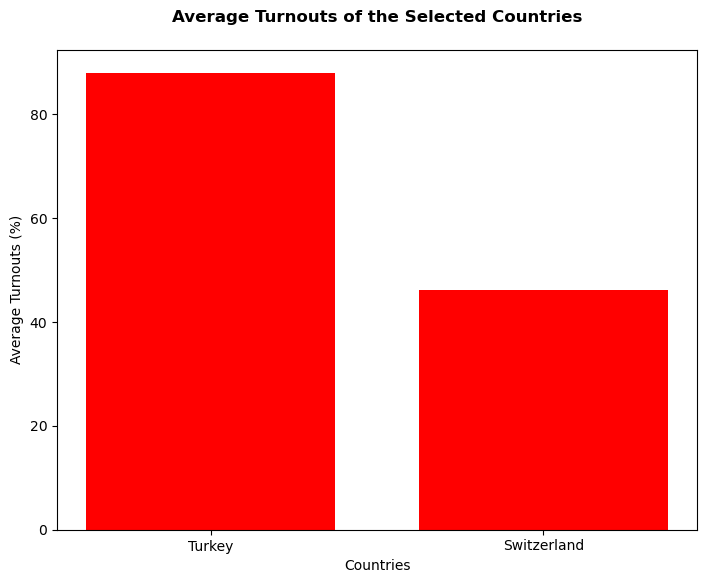

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
countries = ['Turkey', 'Switzerland']
turnouts = [turnout_list['Turkey'],turnout_list['Switzerland']]
plt.title('Average Turnouts of the Selected Countries', fontsize=12, fontweight='bold', pad=20)
ax.bar(countries,turnouts, color = 'r', width = 0.75)
plt.ylabel('Average Turnouts (%)')
plt.xlabel('Countries')
plt.show()

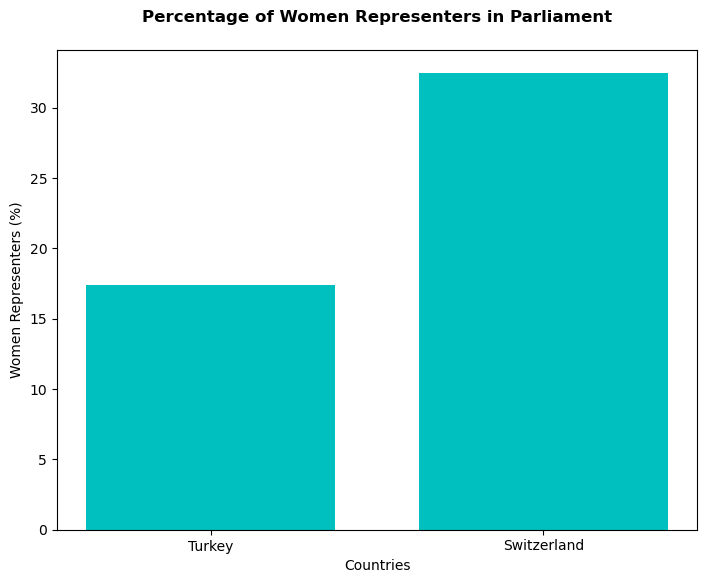

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
countries = ['Turkey', 'Switzerland']
women_in_parliament = [df_dict['Turkey']['women_in_parliament'][0],df_dict['Switzerland']['women_in_parliament'][0]]
plt.title('Percentage of Women Representers in Parliament', fontsize=12, fontweight='bold', pad=20)
ax.bar(countries,women_in_parliament, color = 'c', width = 0.75)
plt.ylabel('Women Representers (%)')
plt.xlabel('Countries')
plt.show()

## Gender of Respondents

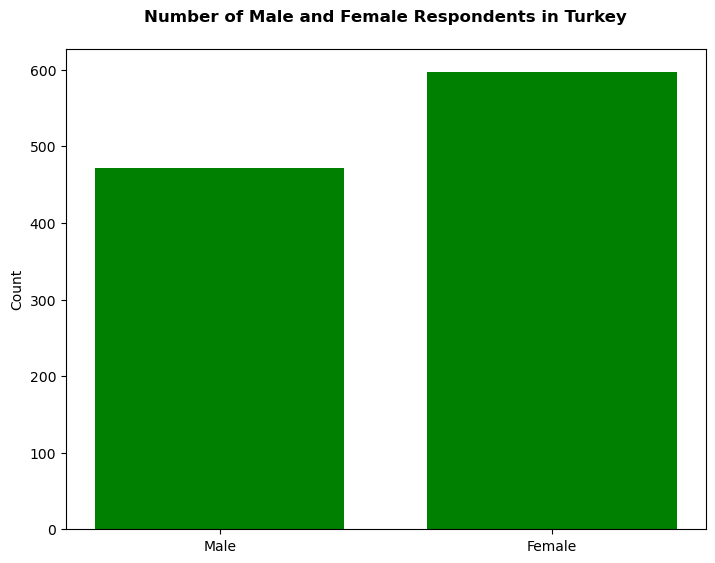

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
count_t = {count_male_t,count_female_t}
plt.title('Number of Male and Female Respondents in Turkey', fontsize=12, fontweight='bold', pad=20)
ax.bar(gender,count_t, color = 'g', width = 0.75)
plt.ylabel('Count')
plt.show()

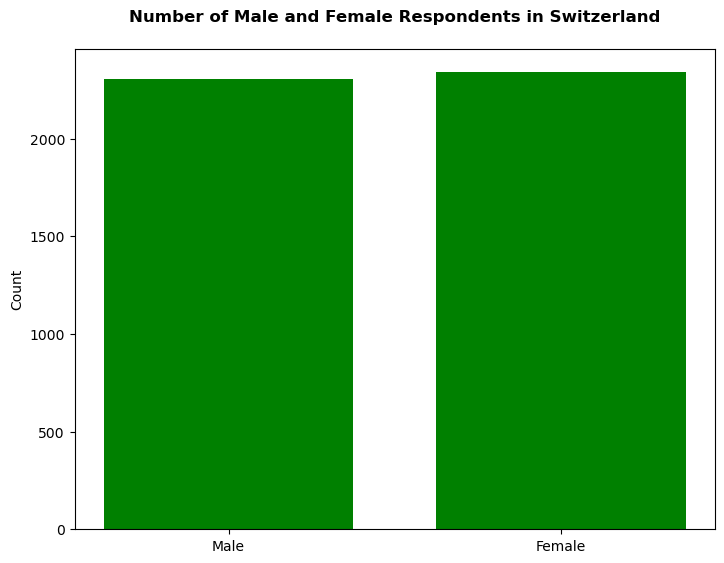

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
count_s = {count_male_s,count_female_s }
plt.title('Number of Male and Female Respondents in Switzerland', fontsize=12, fontweight='bold', pad=20)
ax.bar(gender,count_s, color = 'g', width = 0.75)
plt.ylabel('Count')
plt.show()

## Education Status

### Education Status is determined by ISCED LEVEL categories.

#### 01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION
#### 02. ISCED LEVEL 1 - PRIMARY
#### 03. ISCED LEVEL 2 - LOWER SECONDARY
#### 04. ISCED LEVEL 3 - UPPER SECONDARY
#### 06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY
#### 07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT
#### 08. ISCED LEVEL 7 - MASTER OR EQUIVALENT
#### 09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT
#### 00. NONE (NO EDUCATION)
#### -01. MISSING/NO INFORMATION


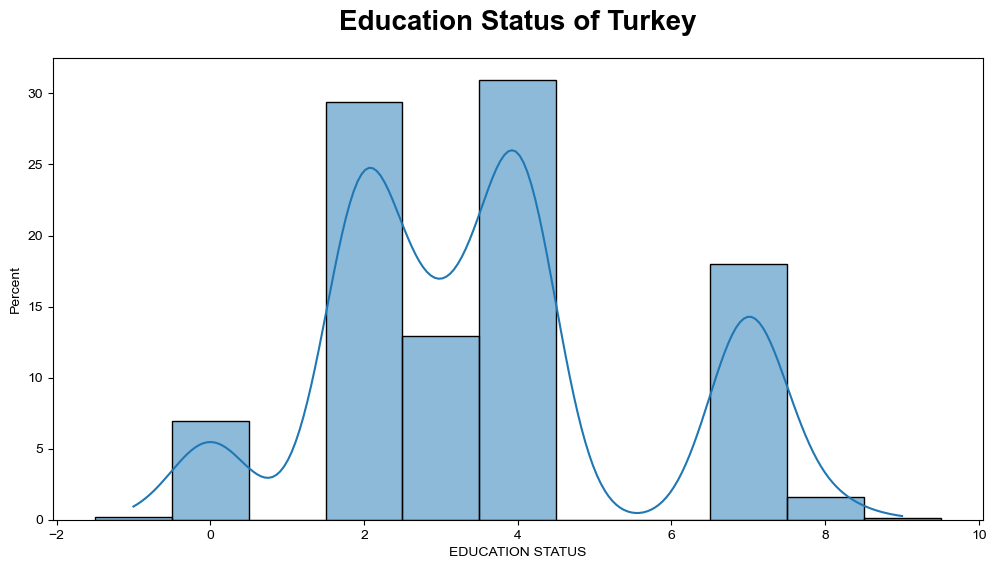

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot( x='education', data=df_dict['Turkey'], stat="percent", discrete=True, kde=True);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Education Status of Turkey', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('EDUCATION STATUS')
plt.show()

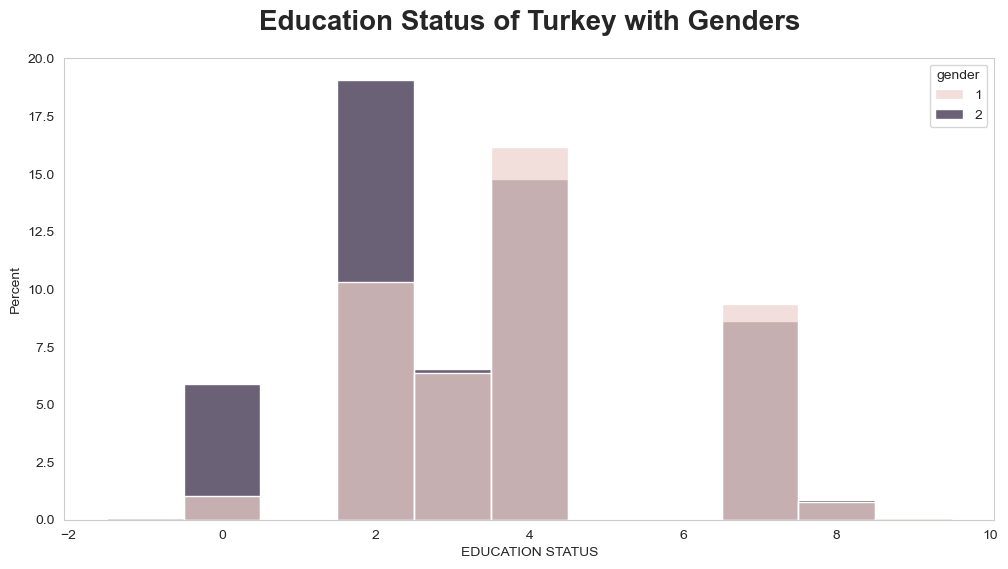

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot( x='education', data=df_dict['Turkey'],alpha = .7 ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Education Status of Turkey with Genders', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('EDUCATION STATUS')
plt.show()

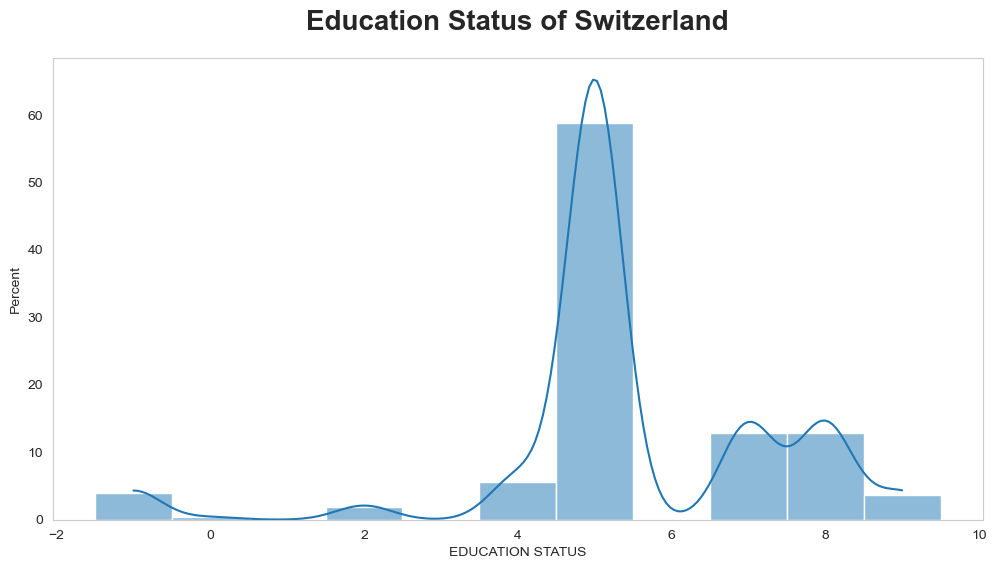

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot( x='education', data=df_dict['Switzerland'],  stat="percent", discrete=True, kde=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Education Status of Switzerland', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('EDUCATION STATUS')
plt.show()


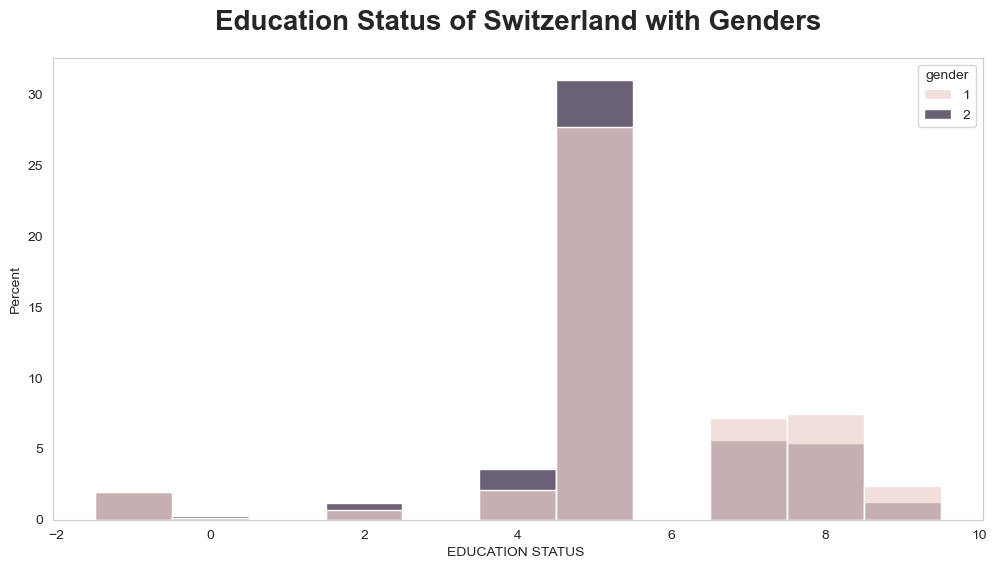

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot( x='education', data=df_dict['Switzerland'],alpha = .7
            ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Education Status of Switzerland with Genders', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('EDUCATION STATUS ')
plt.show()

## Degree of Closeness to Party

#### 1. VERY CLOSE
#### 2. SOMEWHAT CLOSE
####  3. NOT VERY CLOSE
#### -1. MISSING/NO INFORMATION


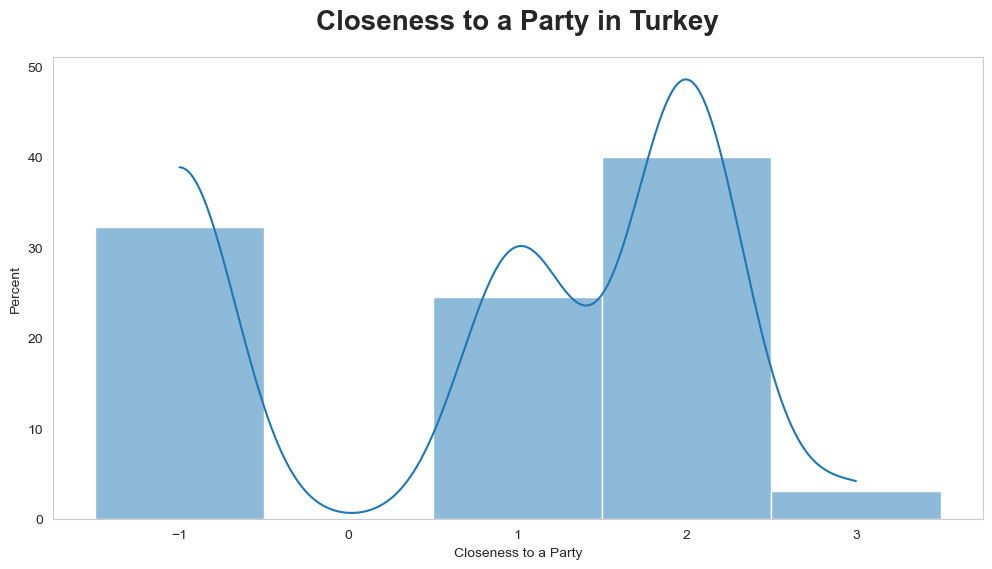

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot( x='closeness_party', data=df_dict['Turkey'],  stat="percent", discrete=True, kde=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Closeness to a Party in Turkey', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Closeness to a Party')
plt.show()

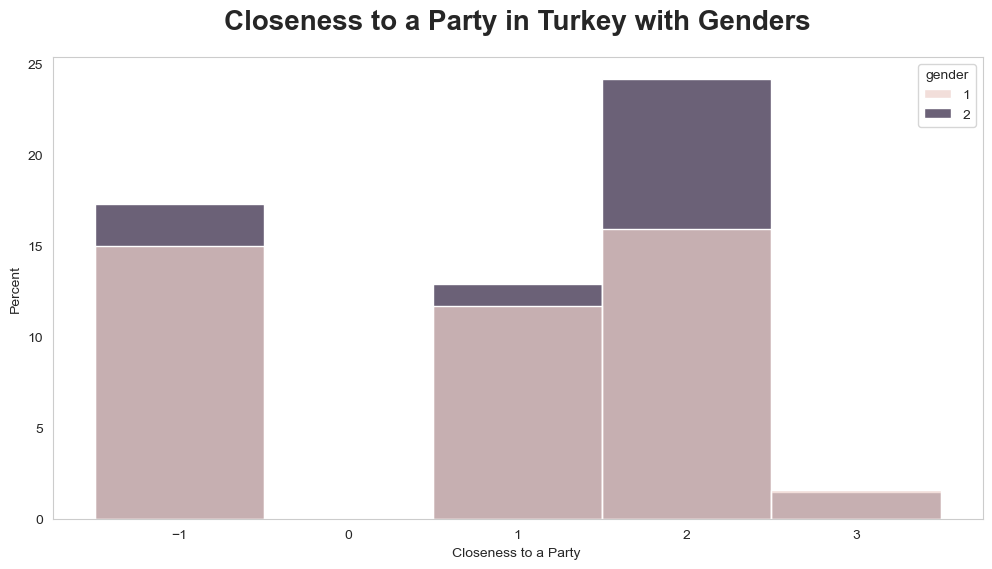

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot( x='closeness_party', data=df_dict['Turkey'],alpha = .7
            ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Closeness to a Party in Turkey with Genders', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Closeness to a Party ')
plt.show()

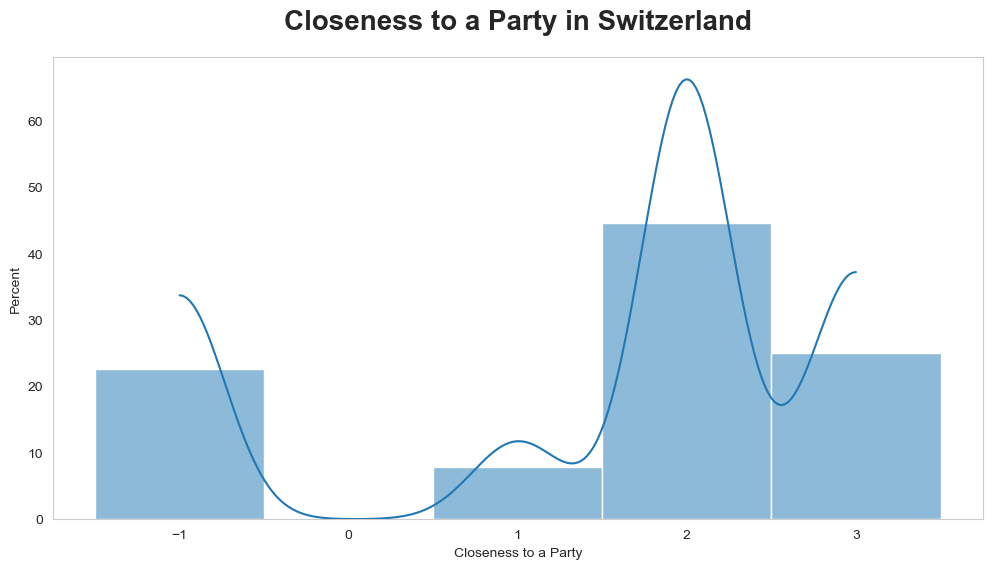

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot( x='closeness_party', data=df_dict['Switzerland'],  stat="percent", discrete=True, kde=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Closeness to a Party in Switzerland', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Closeness to a Party')
plt.show()

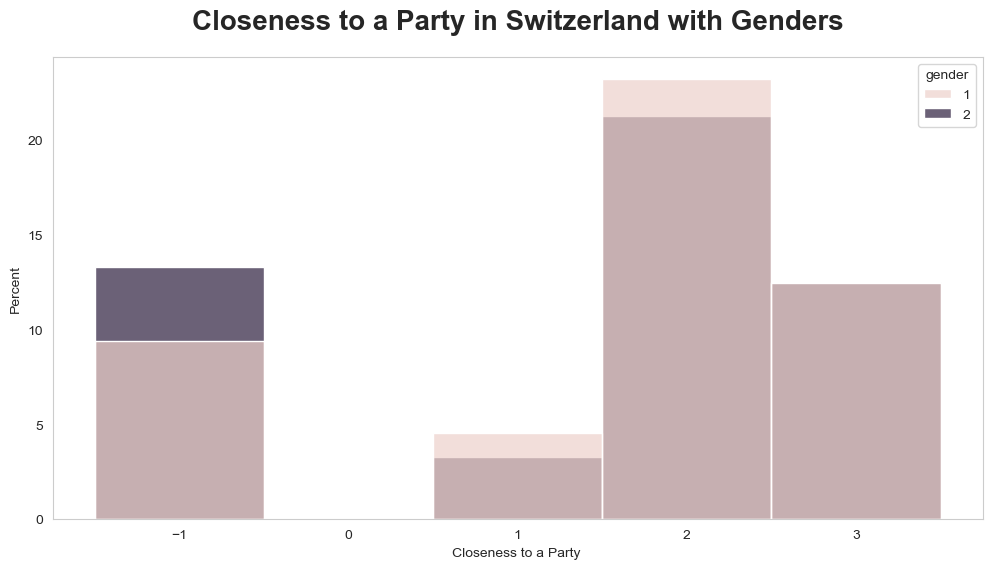

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot( x='closeness_party', data=df_dict['Switzerland'],alpha = .7
            ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Closeness to a Party in Switzerland with Genders', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Closeness to a Party ')
plt.show()

## Employement Status

#### 01. EMPLOYED - FULL-TIME (32 OR MORE HOURS WEEKLY)
#### 02. EMPLOYED - PART-TIME (15-32 HOURS WEEKLY)
#### 03. EMPLOYED - LESS THAN 15 HOURS
#### 04. HELPING FAMILY MEMBER
#### 05. UNEMPLOYED
#### 06. STUDENT, IN SCHOOL, IN VOCATIONAL TRAINING
#### 07. RETIRED
#### 08. HOUSEWIFE, HOME DUTIES
#### 09. PERMANENTLY DISABLED
#### 10. OTHERS, NOT IN THE LABOR FORCE
#### -1. MISSING/NO INFORMATION


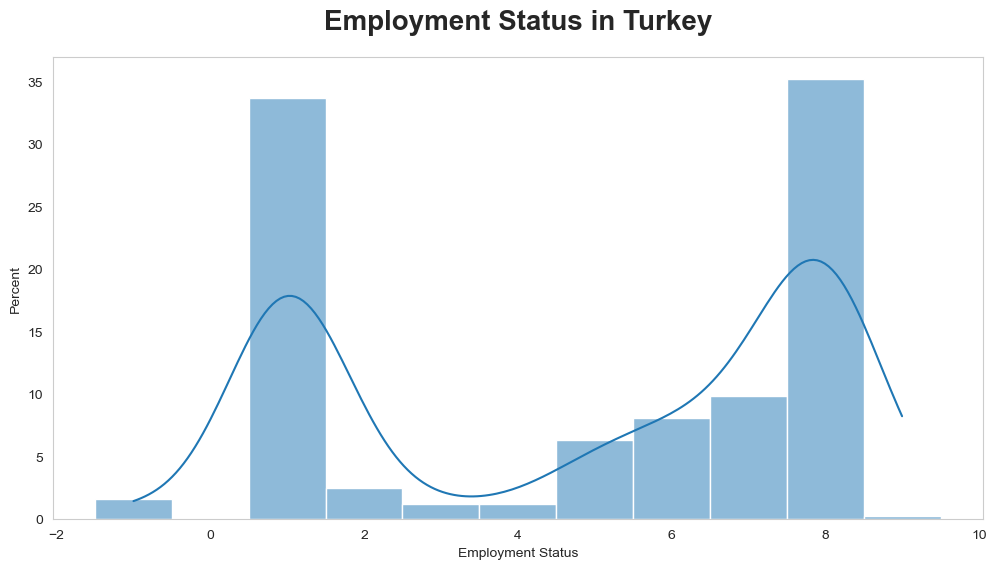

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot( x='employement', data=df_dict['Turkey'],  stat="percent", discrete=True, kde=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Employment Status in Turkey', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Employment Status')
plt.show()


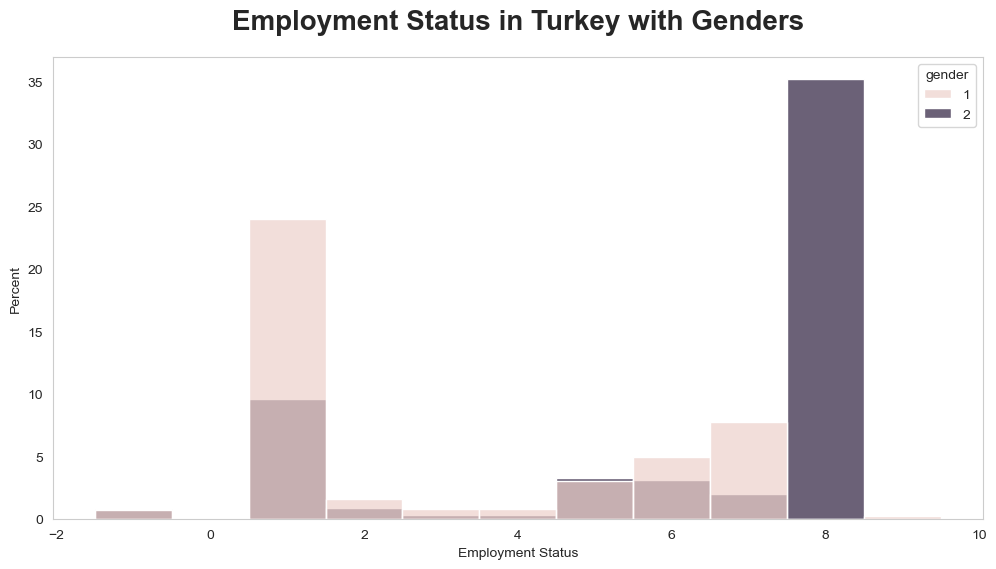

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot( x='employement', data=df_dict['Turkey'],alpha = .7
            ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Employment Status in Turkey with Genders', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Employment Status')
plt.show()

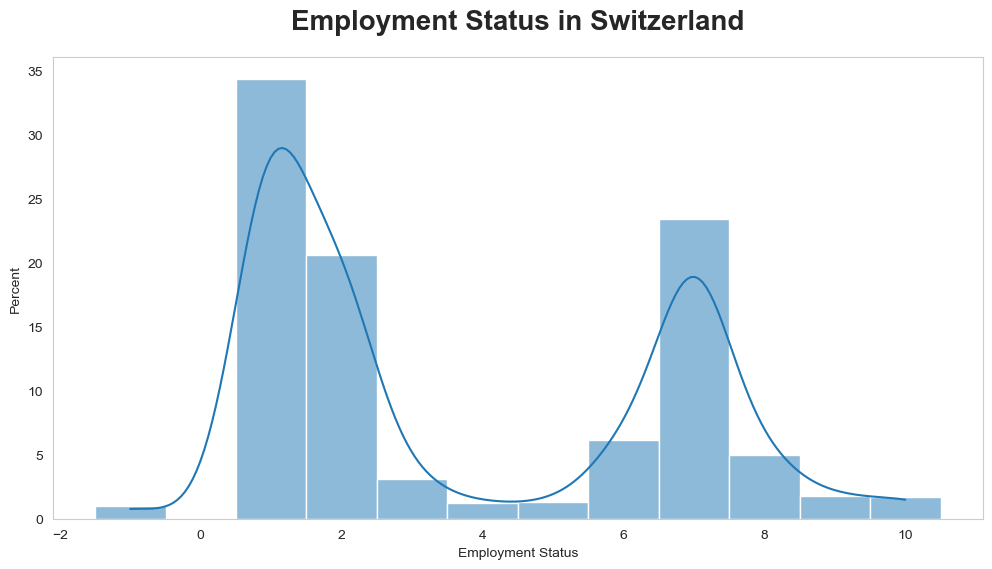

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot( x='employement', data=df_dict['Switzerland'],  stat="percent", discrete=True, kde=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Employment Status in Switzerland', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Employment Status')
plt.show()

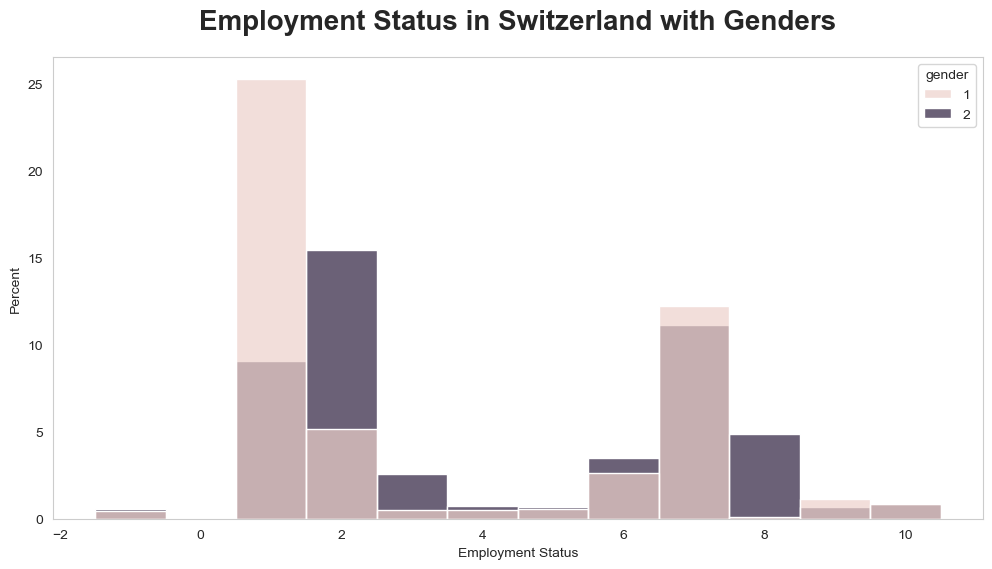

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot( x='employement', data=df_dict['Switzerland'],alpha = .7
            ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Employment Status in Switzerland with Genders', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Employment Status')
plt.show()